## TP 1 : Introduction au deep learning pour le NLP


Dans ce TP; on changera un peu des bases classiques d'apprentissage statistique, pour traiter un type de données différentes : le texte. 


#### Analyse de films avec Word2Vec - Une approche approfondie

##### 1. Configuration initiale et imports

In [1]:
# 1. Imports et configuration
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Configuration des visualisations
sns.set_theme() 
sns.set_palette("husl")
pd.set_option('display.max_columns', None)


In [3]:
# 2. Chargement des données
print("Chargement des données...")
df = pd.read_csv('movies_metadata.csv')
print(f"Dimensions du dataset: {df.shape}")

print("\nAperçu des premières lignes:")
display(df.head())

Chargement des données...
Dimensions du dataset: (45466, 24)

Aperçu des premières lignes:


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [4]:
# Affichage des colonnes disponibles
print("\nColonnes disponibles:")
print(df.columns.tolist())



Colonnes disponibles:
['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id', 'imdb_id', 'original_language', 'original_title', 'overview', 'popularity', 'poster_path', 'production_companies', 'production_countries', 'release_date', 'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title', 'video', 'vote_average', 'vote_count']


In [5]:

# 3. Prétraitement des données numériques
print("\nPrétraitement des variables numériques...")

# Conversion en types numériques
df['popularity'] = pd.to_numeric(df['popularity'], errors='coerce')
df['revenue'] = pd.to_numeric(df['revenue'], errors='coerce')
df['vote_average'] = pd.to_numeric(df['vote_average'], errors='coerce')


Prétraitement des variables numériques...


#### Analyse des statistiques descriptives

L'analyse descriptive des trois variables cibles (revenue, popularity, vote_average) montre des distributions très différentes :

- Le revenue présente une distribution fortement asymétrique avec beaucoup de valeurs nulles (médiane à 0$) et quelques valeurs très élevées (max à 2.79B$), suggérant que peu de films génèrent des revenus très importants.

- La popularité suit un schéma similaire avec une forte asymétrie : la plupart des films ont une popularité faible (médiane à 1.13) tandis que quelques-uns atteignent des scores très élevés (max à 547).

- Les notes moyennes (vote_average) montrent une distribution plus équilibrée, centrée autour de 5.6/10, avec la majorité des films notés entre 5 et 6.8.

Ces observations suggèrent qu'une transformation des données (notamment pour revenue et popularity) sera nécessaire avant la modélisation.

In [6]:

# 4. Analyse descriptive initiale
print("\nStatistiques descriptives des variables cibles:")
target_vars = ['revenue', 'popularity', 'vote_average']
print(df[target_vars].describe())



Statistiques descriptives des variables cibles:
            revenue    popularity  vote_average
count  4.546000e+04  45460.000000  45460.000000
mean   1.120935e+07      2.921478      5.618207
std    6.433225e+07      6.005414      1.924216
min    0.000000e+00      0.000000      0.000000
25%    0.000000e+00      0.385948      5.000000
50%    0.000000e+00      1.127685      6.000000
75%    0.000000e+00      3.678902      6.800000
max    2.787965e+09    547.488298     10.000000


#### Analyse des valeurs manquantes

L'analyse des valeurs manquantes dans notre dataset montre un très faible taux de données manquantes (0.01%) pour chacune des variables cibles (revenue, popularity et vote_average), avec seulement 6 valeurs manquantes par variable. Ce faible pourcentage n'aura pas d'impact significatif sur notre modélisation et ces valeurs pourront être simplement supprimées ou imputées sans affecter la qualité de l'analyse.

In [7]:

# 5. Analyse des valeurs manquantes
print("\nAnalyse des valeurs manquantes:")
missing_values = df[target_vars].isnull().sum()
missing_pct = (missing_values / len(df)) * 100
for var, missing, pct in zip(target_vars, missing_values, missing_pct):
    print(f"{var}: {missing} valeurs manquantes ({pct:.2f}%)")


Analyse des valeurs manquantes:
revenue: 6 valeurs manquantes (0.01%)
popularity: 6 valeurs manquantes (0.01%)
vote_average: 6 valeurs manquantes (0.01%)


#### Analyse des distributions


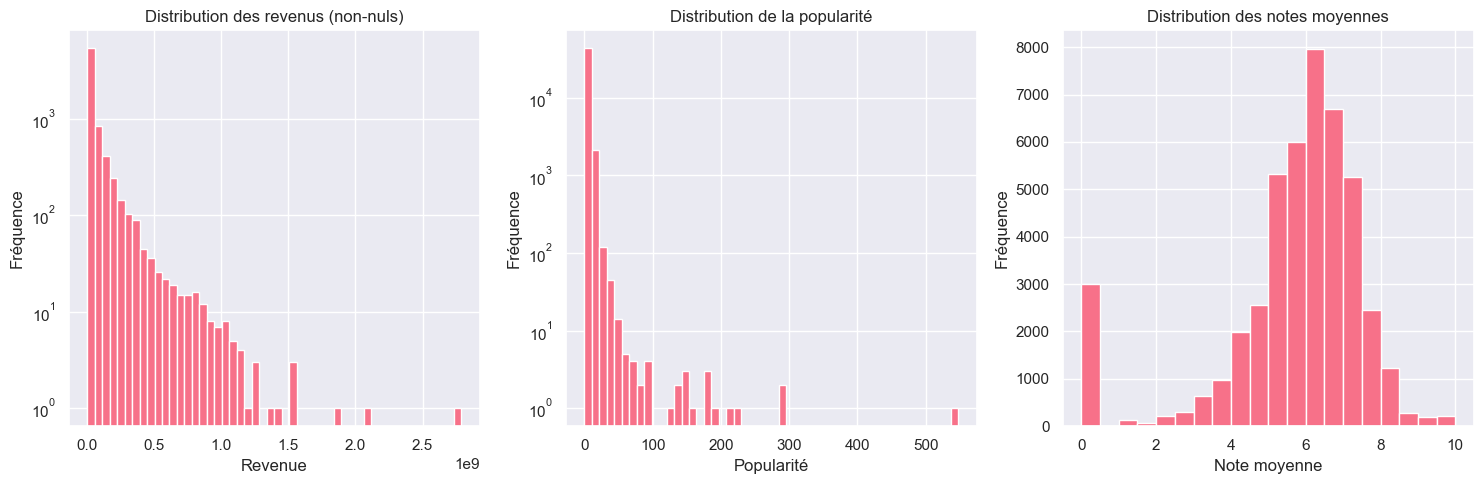

In [8]:

# 6. Visualisations des distributions

# Revenue
plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.hist(df[df['revenue'] > 0]['revenue'], bins=50)
plt.title('Distribution des revenus (non-nuls)')
plt.xlabel('Revenue')
plt.ylabel('Fréquence')
plt.yscale('log')

# Popularity
plt.subplot(132)
plt.hist(df[df['popularity'].notna()]['popularity'], bins=50)
plt.title('Distribution de la popularité')
plt.xlabel('Popularité')
plt.ylabel('Fréquence')
plt.yscale('log')

# Vote Average
plt.subplot(133)
plt.hist(df[df['vote_average'].notna()]['vote_average'], bins=20)
plt.title('Distribution des notes moyennes')
plt.xlabel('Note moyenne')
plt.ylabel('Fréquence')

plt.tight_layout()
plt.show()



La visualisation des distributions de nos trois variables cibles révèle des patterns distincts :

- Les revenus (revenue) montrent une distribution fortement asymétrique avec une longue queue à droite, indiquant que la majorité des films génèrent des revenus modestes tandis qu'un petit nombre de films produisent des revenus exceptionnellement élevés.

- La popularité suit une tendance similaire avec une distribution très déséquilibrée : beaucoup de films ont une faible popularité et quelques-uns seulement atteignent des niveaux de popularité très élevés.

- Les notes moyennes présentent une distribution plus proche d'une normale, centrée autour de 6-7/10, avec une légère asymétrie négative. Cette distribution plus équilibrée suggère une répartition plus uniforme des notes attribuées aux films.

Ces observations confirment la nécessité d'appliquer des transformations aux variables revenue et popularity avant la modélisation, tandis que vote_average pourra être utilisée telle quelle.

#### Analyse des corrélations

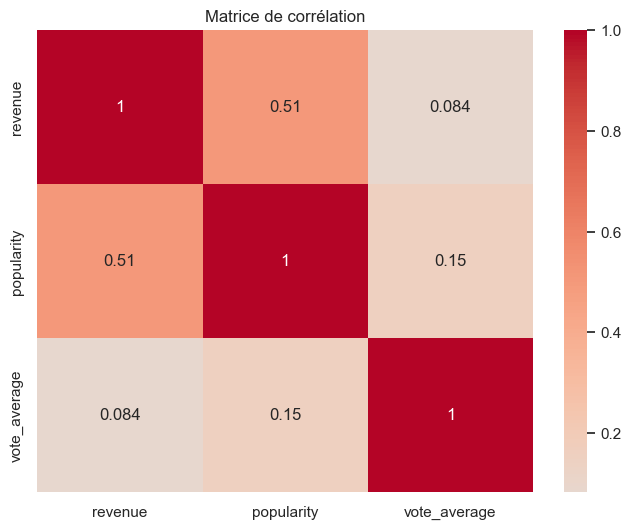

In [9]:

# 7. Analyse des corrélations
correlation_matrix = df[target_vars].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matrice de corrélation')
plt.show()




La matrice de corrélation entre nos trois variables cibles révèle des relations intéressantes :

- Une corrélation modérée positive (0.51) entre revenue et popularity, suggérant que les films plus populaires tendent à générer plus de revenus.

- Des corrélations très faibles entre vote_average et les autres variables (0.084 avec revenue et 0.15 avec popularity), indiquant que la note moyenne d'un film est largement indépendante de son succès commercial ou de sa popularité.

Ces résultats suggèrent que chaque variable apporte une information relativement indépendante et qu'il sera pertinent de les modéliser séparément.

#### Analyse statistique détaillée

L'analyse détaillée des statistiques pour chaque variable révèle des caractéristiques distinctes :

La distribution du revenue montre une forte disparité (écart-type de 64M$) avec une médiane à 0$ et une moyenne à 11.2M$, confirmant une asymétrie très positive (skewness de 12.27). Les valeurs s'étendent de 0$ à 2.8B$.

La popularité présente une asymétrie encore plus marquée (skewness de 29.23) avec une médiane (1.13) très inférieure à la moyenne (2.92). Les valeurs vont de 0 à 547.49.

Les notes moyennes montrent une distribution plus équilibrée autour d'une moyenne de 5.62 et une médiane de 6.00, avec une légère asymétrie négative (skewness de -1.52). L'échelle va de 0 à 10.

Ces statistiques confirment la nécessité de transformer les variables revenue et popularity avant la modélisation.

In [10]:

# 8. Analyse statistique détaillée
print("\nAnalyse statistique détaillée:")

for var in target_vars:
    data = df[var].dropna()
    print(f"\nStatistiques pour {var}:")
    print(f"Nombre de valeurs non-nulles: {len(data)}")
    print(f"Moyenne: {data.mean():.2f}")
    print(f"Médiane: {data.median():.2f}")
    print(f"Écart-type: {data.std():.2f}")
    print(f"Skewness: {data.skew():.2f}")
    print(f"Min: {data.min():.2f}")
    print(f"Max: {data.max():.2f}")


Analyse statistique détaillée:

Statistiques pour revenue:
Nombre de valeurs non-nulles: 45460
Moyenne: 11209348.54
Médiane: 0.00
Écart-type: 64332246.74
Skewness: 12.27
Min: 0.00
Max: 2787965087.00

Statistiques pour popularity:
Nombre de valeurs non-nulles: 45460
Moyenne: 2.92
Médiane: 1.13
Écart-type: 6.01
Skewness: 29.23
Min: 0.00
Max: 547.49

Statistiques pour vote_average:
Nombre de valeurs non-nulles: 45460
Moyenne: 5.62
Médiane: 6.00
Écart-type: 1.92
Skewness: -1.52
Min: 0.00
Max: 10.00


#### Analyse des boxplots - Distribution et outliers

Les boxplots révèlent la présence et l'impact des valeurs extrêmes dans nos trois variables :

- Le revenue présente de nombreux outliers très éloignés de la médiane, avec certains films générant des revenus exceptionnellement élevés (jusqu'à 2.8 milliards).

- La popularity montre également plusieurs valeurs extrêmes, avec quelques films atteignant des scores de popularité très élevés par rapport à la masse des données.

- Le vote_average a une distribution plus compacte, avec relativement peu d'outliers, confirmant sa répartition plus homogène entre 0 et 10.

Ces visualisations confirment la nécessité d'une gestion appropriée des outliers, particulièrement pour revenue et popularity, lors de la phase de modélisation.

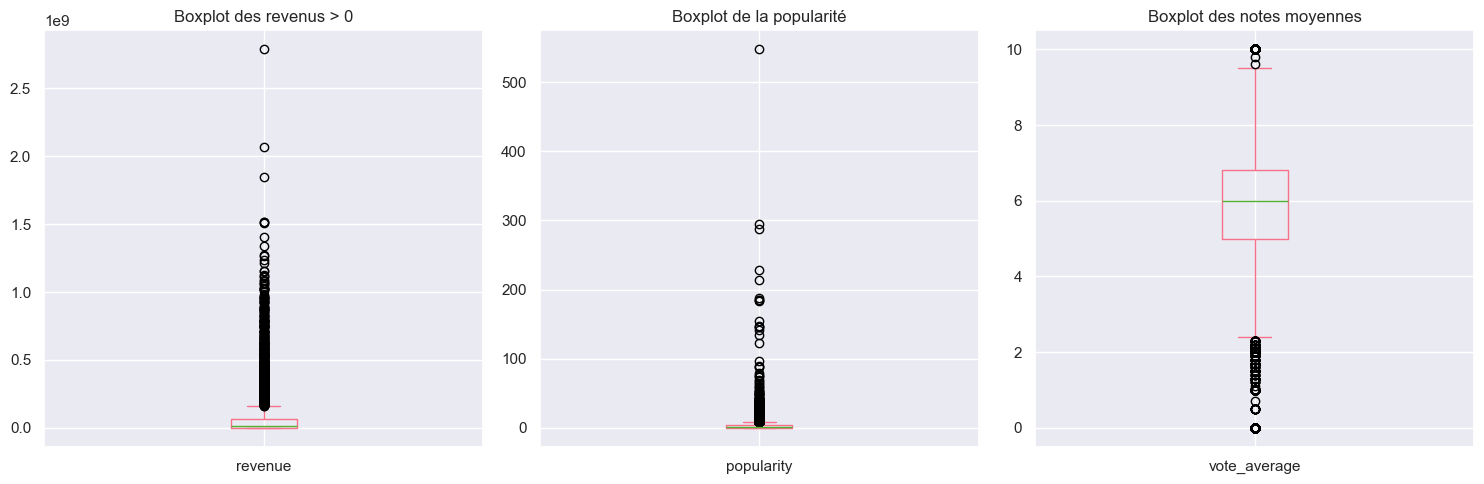

In [11]:

# 9. Boxplots pour visualiser les outliers
plt.figure(figsize=(15, 5))

plt.subplot(131)
df[df['revenue'] > 0]['revenue'].plot(kind='box')
plt.title('Boxplot des revenus > 0')

plt.subplot(132)
df[df['popularity'].notna()]['popularity'].plot(kind='box')
plt.title('Boxplot de la popularité')

plt.subplot(133)
df[df['vote_average'].notna()]['vote_average'].plot(kind='box')
plt.title('Boxplot des notes moyennes')

plt.tight_layout()
plt.show()


#### Résumé des observations clés

L'analyse globale du dataset révèle trois patterns distincts :

Les revenus montrent une distribution extrêmement déséquilibrée : sur 45,460 films, 38,052 ont un revenu nul, tandis que la moyenne atteint 11.2M$, illustrant l'écart considérable entre les blockbusters et la majorité des films.

La popularité suit une tendance similaire avec une médiane (1.13) nettement inférieure à la moyenne (2.92), indiquant qu'un petit nombre de films captent la majorité de l'attention.

Les notes présentent une distribution plus équilibrée, avec une médiane (6.0) proche de la moyenne (5.62), suggérant une évaluation plus uniforme des films.

Ces observations seront déterminantes pour guider nos choix de prétraitement et de modélisation.

In [12]:

# 10. Résumé des observations clés
print("\nObservations clés:")
print("1. Distribution des revenus:")
print(f"   - {(df['revenue'] == 0).sum()} films ont un revenu nul")
print(f"   - Revenu médian: ${df['revenue'].median():,.2f}")
print(f"   - Revenu moyen: ${df['revenue'].mean():,.2f}")

print("\n2. Distribution de la popularité:")
print(f"   - Popularité médiane: {df['popularity'].median():.2f}")
print(f"   - Popularité moyenne: {df['popularity'].mean():.2f}")

print("\n3. Distribution des notes:")
print(f"   - Note médiane: {df['vote_average'].median():.2f}")
print(f"   - Note moyenne: {df['vote_average'].mean():.2f}")


Observations clés:
1. Distribution des revenus:
   - 38052 films ont un revenu nul
   - Revenu médian: $0.00
   - Revenu moyen: $11,209,348.54

2. Distribution de la popularité:
   - Popularité médiane: 1.13
   - Popularité moyenne: 2.92

3. Distribution des notes:
   - Note médiane: 6.00
   - Note moyenne: 5.62


#### Analyse des distributions et implications pour la modélisation

La distribution des variables revenue et popularity suit une décroissance exponentielle caractéristique, avec des implications importantes pour la modélisation :

- Un petit nombre de films concentre la majorité des revenus et de la popularité
- La grande majorité des films présente des valeurs faibles ou nulles
- Cette distribution très déséquilibrée pose un défi pour la modélisation

Pour établir une base de comparaison pertinente, il est judicieux de calculer les métriques (R2 et MSE) pour des prédicteurs simples :
- La moyenne
- La médiane 
- Une valeur nulle (0)

Ces baselines nous permettront d'évaluer si nos modèles plus complexes apportent une réelle valeur ajoutée par rapport à ces prédictions naïves.

In [13]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

In [14]:

# Calcul des baselines pour Revenue
print("Baselines pour Revenue:")
y_true = df['revenue'].astype('float').fillna(0)  # Remplacement des NaN par 0
mean = y_true.mean()
median = y_true.median()

# Prédictions avec les différentes baselines
y_pred_mean = np.full_like(y_true, mean)
y_pred_median = np.full_like(y_true, median)
y_pred_zero = np.zeros_like(y_true)

# Calcul des métriques
m_rev = {
    'R2_mean': r2_score(y_true, y_pred_mean),
    'MSE_mean': mean_squared_error(y_true, y_pred_mean),
    'R2_median': r2_score(y_true, y_pred_median),
    'MSE_median': mean_squared_error(y_true, y_pred_median),
    'R2_zero': r2_score(y_true, y_pred_zero),
    'MSE_zero': mean_squared_error(y_true, y_pred_zero)
}
print("Revenue metrics:", m_rev)


Baselines pour Revenue:
Revenue metrics: {'R2_mean': 0.0, 'MSE_mean': 4138017360390860.5, 'R2_median': -0.030356647353839694, 'MSE_median': 4263633694144312.0, 'R2_zero': -0.030356647353839694, 'MSE_zero': 4263633694144312.0}



Les baselines établies pour la prédiction des revenus montrent des performances limitées :
- La prédiction par la moyenne donne un R² de 0 (référence)
- Les prédictions par la médiane et par zéro donnent des R² légèrement négatifs (-0.03)
- Les MSE sont très élevées dans tous les cas, reflétant la grande variance des revenus

Ces faibles performances serviront de référence minimale pour évaluer nos modèles plus sophistiqués.

In [15]:

# Baselines pour Popularity
print("\nBaselines pour Popularity:")
y_true = df['popularity'].astype('float').fillna(0)
mean = y_true.mean()
median = y_true.median()

y_pred_mean = np.full_like(y_true, mean)
y_pred_median = np.full_like(y_true, median)
y_pred_zero = np.zeros_like(y_true)

m_pop = {
    'R2_mean': r2_score(y_true, y_pred_mean),
    'MSE_mean': mean_squared_error(y_true, y_pred_mean),
    'R2_median': r2_score(y_true, y_pred_median),
    'MSE_median': mean_squared_error(y_true, y_pred_median),
    'R2_zero': r2_score(y_true, y_pred_zero),
    'MSE_zero': mean_squared_error(y_true, y_pred_zero)
}
print("Popularity metrics:", m_pop)



Baselines pour Popularity:
Popularity metrics: {'R2_mean': 0.0, 'MSE_mean': 36.060574604581426, 'R2_median': -0.08921926639175215, 'MSE_median': 39.27787261646723, 'R2_zero': -0.23662360570454166, 'MSE_zero': 44.59335779129511}




Les métriques de base pour la popularité révèlent une prédiction difficile :
- Prédiction par la moyenne : R² = 0 (baseline de référence)
- Prédiction par la médiane : R² = -0.089 (moins performante)
- Prédiction à zéro : R² = -0.237 (performance la plus faible)

Les MSE restent modérées comparées aux revenus, mais les R² négatifs suggèrent que même des prédictions simples sont peu fiables.

In [16]:

# Baselines pour Vote Average
print("\nBaselines pour Vote Average:")
y_true = df['vote_average'].astype('float').fillna(0)
mean = y_true.mean()
median = y_true.median()

y_pred_mean = np.full_like(y_true, mean)
y_pred_median = np.full_like(y_true, median)
y_pred_zero = np.zeros_like(y_true)

m_vot = {
    'R2_mean': r2_score(y_true, y_pred_mean),
    'MSE_mean': mean_squared_error(y_true, y_pred_mean),
    'R2_median': r2_score(y_true, y_pred_median),
    'MSE_median': mean_squared_error(y_true, y_pred_median),
    'R2_zero': r2_score(y_true, y_pred_zero),
    'MSE_zero': mean_squared_error(y_true, y_pred_zero)
}
print("Vote Average metrics:", m_vot)



Baselines pour Vote Average:
Vote Average metrics: {'R2_mean': 0.0, 'MSE_mean': 3.7062020060994336, 'R2_median': -0.039483119102943665, 'MSE_median': 3.852534421325826, 'R2_zero': -8.514355652152425, 'MSE_zero': 35.2621240047508}



Les baselines pour les notes moyennes montrent des patterns intéressants :
- La moyenne sert de référence (R² = 0)
- La médiane performe légèrement moins bien (R² = -0.039)
- La prédiction à zéro est particulièrement mauvaise (R² = -8.51)

Ces résultats indiquent que les notes moyennes, bien que plus stables, restent difficiles à prédire avec des modèles naïfs.

In [17]:

# Création d'un résumé des performances sous forme de DataFrame
performance_summary = pd.DataFrame({
    'Revenue': [m_rev['R2_mean'], m_rev['R2_median'], m_rev['R2_zero']],
    'Popularity': [m_pop['R2_mean'], m_pop['R2_median'], m_pop['R2_zero']],
    'Vote_Average': [m_vot['R2_mean'], m_vot['R2_median'], m_vot['R2_zero']]
}, index=['Mean', 'Median', 'Zero'])

print("\nRésumé des performances (R2):")
print(performance_summary)


Résumé des performances (R2):
         Revenue  Popularity  Vote_Average
Mean    0.000000    0.000000      0.000000
Median -0.030357   -0.089219     -0.039483
Zero   -0.030357   -0.236624     -8.514356


#### Analyse des performances des baselines

Les résultats des modèles de base (mean, median, zero) montrent des performances très faibles sur l'ensemble des variables :

Revenue

- La moyenne donne un R² de 0 (par définition)
- La médiane et la prédiction à zéro donnent des R² légèrement négatifs (-0.03)
- Les MSE sont très élevées à cause de l'échelle des revenus

Popularity

- La moyenne sert de référence (R² = 0)
- La médiane performe légèrement moins bien (R² = -0.09)
- Prédire zéro donne les pires résultats (R² = -0.24)

Vote Average

- La moyenne reste la meilleure baseline
- Les prédictions à zéro sont particulièrement mauvaises (R² = -8.51)
- La médiane est proche des performances de la moyenne

Ces résultats serviront de référence pour évaluer nos modèles plus complexes : tout modèle devra au minimum surpasser ces baselines pour être considéré comme utile.

### Premier modèle ML classique

In [18]:
# 1. Import des bibliothèques nécessaires
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

Conversion des variables numériques (popularity, budget, runtime, revenue, vote_average) en format approprié avec gestion des erreurs. Les valeurs non numériques sont transformées en NaN pour assurer la cohérence des données avant la modélisation. Cette étape est cruciale pour garantir la qualité des analyses statistiques à venir.

In [19]:
# 2. Préparation des données avec nettoyage
# Conversion des colonnes en numérique avec gestion des erreurs
df['popularity'] = pd.to_numeric(df['popularity'], errors='coerce')
df['budget'] = pd.to_numeric(df['budget'], errors='coerce')
df['runtime'] = pd.to_numeric(df['runtime'], errors='coerce')
df['revenue'] = pd.to_numeric(df['revenue'], errors='coerce')
df['vote_average'] = pd.to_numeric(df['vote_average'], errors='coerce')

In [20]:
# Remplacement des NaN par 0
df = df.fillna(0)

# Création du dataset avec les features sélectionnées
dataset = df[['adult', 'budget', 'runtime', 'original_language', 'popularity', 'vote_average', 'revenue']]



Transformation des variables catégorielles en format numérique :
- Conversion binaire de la variable 'adult' (True/False → 1/0)
- Encodage des langues originales en indices numériques via un dictionnaire de correspondance

Cette étape permet d'utiliser ces variables dans nos modèles d'apprentissage automatique.

In [21]:
# 3. Transformation des variables catégorielles
# Convertir 'adult' en numérique
dataset['adult'] = dataset.adult.apply(lambda x: 1 if x==True else 0)

# Encoder original_language
from collections import Counter
dic_language = Counter(dataset.original_language)
dic_language = {list(dic_language.keys())[i]: i for i in range(len(dic_language))}
dataset['original_language'] = dataset.original_language.apply(lambda x: dic_language[x])


### Configuration de GridSearchCV avec AdaBoost

Configuration de la recherche par grille pour optimiser les hyperparamètres d'AdaBoost avec :
- Trois profondeurs différentes d'arbres de décision (2, 3, 10)
- Quatre taux d'apprentissage (0.01, 0.1, 1.0, 10)
- Deux valeurs pour le nombre d'estimateurs (10, 50)

Cette grille permettra de trouver la meilleure combinaison d'hyperparamètres pour notre modèle.

In [22]:

# 4. Configuration de GridSearchCV avec AdaBoost
params_grid = {
    'base_estimator': [
        DecisionTreeRegressor(max_depth=2),
        DecisionTreeRegressor(max_depth=3),
        DecisionTreeRegressor(max_depth=10)
    ],
    'learning_rate': [0.01, 0.1, 1.0, 10],
    'n_estimators': [10, 50]
}

In [23]:

# 5. Entraînement et évaluation pour chaque variable cible
print("Entraînement des modèles...")

# Revenue
print("\nOptimisation pour Revenue:")
rg = GridSearchCV(AdaBoostRegressor(), param_grid=params_grid, scoring='r2', cv=3)
X = dataset[['adult', 'budget', 'runtime', 'original_language']]
y = dataset['revenue']
rg.fit(X, y)
print("Meilleur score R2:", rg.best_score_)
print("Meilleurs paramètres:", rg.best_params_)


Entraînement des modèles...

Optimisation pour Revenue:
Meilleur score R2: 0.5965907358505144
Meilleurs paramètres: {'base_estimator': DecisionTreeRegressor(max_depth=3), 'learning_rate': 0.01, 'n_estimators': 50}


In [24]:

# Popularity
print("\nOptimisation pour Popularity:")
rg = GridSearchCV(AdaBoostRegressor(), param_grid=params_grid, scoring='r2', cv=3)
y = dataset['popularity']
rg.fit(X, y)
print("Meilleur score R2:", rg.best_score_)
print("Meilleurs paramètres:", rg.best_params_)




Optimisation pour Popularity:
Meilleur score R2: 0.15835073920816797
Meilleurs paramètres: {'base_estimator': DecisionTreeRegressor(max_depth=3), 'learning_rate': 0.01, 'n_estimators': 50}


In [25]:
# Vote Average
print("\nOptimisation pour Vote Average:")
rg = GridSearchCV(AdaBoostRegressor(), param_grid=params_grid, scoring='r2', cv=3)
y = dataset['vote_average']
rg.fit(X, y)
print("Meilleur score R2:", rg.best_score_)
print("Meilleurs paramètres:", rg.best_params_)


Optimisation pour Vote Average:
Meilleur score R2: -0.025874954258766698
Meilleurs paramètres: {'base_estimator': DecisionTreeRegressor(max_depth=10), 'learning_rate': 0.01, 'n_estimators': 10}


In [26]:

# 6. Comparaison avec Random Forest
print("\nComparaison avec Random Forest:")
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

targets = ['revenue', 'popularity', 'vote_average']
for target in targets:
    score = cross_val_score(
        RandomForestRegressor(n_estimators=100),
        X,
        dataset[target],
        scoring='r2',
        cv=3
    ).mean()
    print(f"Random Forest - {target}: {score:.4f}")


Comparaison avec Random Forest:
Random Forest - revenue: 0.5325
Random Forest - popularity: -0.1810
Random Forest - vote_average: -0.0908


word2vec

In [29]:
# 1. Import des bibliothèques nécessaires
from gensim.models import Word2Vec
import numpy as np
from tqdm import tqdm
import pandas as pd
import re

# 2. Fonction de prétraitement simplifiée
def preprocess_text(text):
    if not isinstance(text, str):
        return []
    # Convertir en minuscules
    text = text.lower()
    # Supprimer la ponctuation
    text = re.sub(r'[^\w\s]', ' ', text)
    # Tokenization simple
    tokens = text.split()
    # Traitement des nombres
    processed_tokens = []
    for token in tokens:
        try:
            float(token)
            processed_tokens.append('NUM')
        except ValueError:
            processed_tokens.append(token)
    return processed_tokens

# 3. Préparation des données
print("Préparation des données pour Word2Vec...")
processed_tokens = []
for text in tqdm(df['overview']):
    processed_tokens.append(preprocess_text(text))
df['processed_tokens'] = processed_tokens

# 4. Entraînement du modèle Word2Vec
print("\nEntraînement du modèle Word2Vec...")
model = Word2Vec(
    sentences=df['processed_tokens'].dropna(),
    vector_size=100,
    window=5,
    min_count=5,
    workers=4,sg=1
)

Préparation des données pour Word2Vec...


100%|██████████| 45466/45466 [00:03<00:00, 15110.36it/s]



Entraînement du modèle Word2Vec...


In [30]:

# 5. Analyse des similarités
print("\nAnalyse des similarités entre mots...")
test_words = ['american', 'love', 'woman', 'september']
for word in test_words:
    try:
        similar_words = model.wv.most_similar(word)
        print(f"\nMots similaires à '{word}':")
        for w, score in similar_words[:5]:
            print(f"{w}: {score:.4f}")
    except KeyError:
        print(f"Le mot '{word}' n'est pas dans le vocabulaire")


Analyse des similarités entre mots...

Mots similaires à 'american':
african: 0.7238
korean: 0.6944
russian: 0.6868
israeli: 0.6735
finnish: 0.6682

Mots similaires à 'love':
madly: 0.6808
romance: 0.6327
affection: 0.6019
romances: 0.5976
friendship: 0.5937

Mots similaires à 'woman':
man: 0.6935
widow: 0.6896
schoolgirl: 0.6757
gentleman: 0.6720
girl: 0.6713

Mots similaires à 'september':
january: 0.9263
february: 0.9193
october: 0.9063
november: 0.8871
11th: 0.8799


In [31]:

# 6. Création des vecteurs de documents
def get_document_vector(tokens, model, vector_size=100):
    vectors = []
    for token in tokens:
        try:
            vector = model.wv[token]
            vectors.append(vector)
        except KeyError:
            continue
    return np.mean(vectors, axis=0) if vectors else np.zeros(vector_size)

# Création des embeddings pour chaque description
print("\nCréation des vecteurs de documents...")
document_vectors = []
for tokens in tqdm(df['processed_tokens']):
    document_vectors.append(get_document_vector(tokens, model))
document_vectors = np.array(document_vectors)



Création des vecteurs de documents...


100%|██████████| 45466/45466 [00:04<00:00, 9266.34it/s] 


In [30]:

# 7. Analyse des résultats
print("\nAnalyse du modèle Word2Vec:")
print(f"Taille du vocabulaire: {len(model.wv.key_to_index)}")
print(f"Dimension des vecteurs: {model.vector_size}")

# 8. Statistiques sur les vecteurs
print("\nStatistiques sur les vecteurs de documents:")
print(f"Forme des vecteurs: {document_vectors.shape}")
print(f"Moyenne globale: {np.mean(document_vectors):.4f}")
print(f"Écart-type global: {np.std(document_vectors):.4f}")


Analyse du modèle Word2Vec:
Taille du vocabulaire: 22588
Dimension des vecteurs: 100

Statistiques sur les vecteurs de documents:
Forme des vecteurs: (45466, 100)
Moyenne globale: -0.0134
Écart-type global: 0.3364


In [31]:

# 9. Analyse du vocabulaire
vocab = model.wv.key_to_index
word_freqs = [(word, model.wv.get_vecattr(word, "count")) 
              for word in vocab]
word_freqs = sorted(word_freqs, key=lambda x: x[1], reverse=True)

print("\nTop 10 mots les plus fréquents:")
for word, freq in word_freqs[:10]:
    print(f"{word}: {freq} occurrences")


Top 10 mots les plus fréquents:
the: 138825 occurrences
a: 99602 occurrences
and: 75905 occurrences
to: 73761 occurrences
of: 70022 occurrences
in: 48796 occurrences
is: 36573 occurrences
his: 36269 occurrences
s: 26499 occurrences
with: 23967 occurrences


In [32]:
from sklearn.manifold import TSNE
import numpy as np

def plot_words(model, words):
    word_vectors = np.array([model.wv[word] for word in words])
    tsne = TSNE(n_components=2)
    reduced = tsne.fit_transform(word_vectors)
    
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=reduced[:, 0], y=reduced[:, 1])
    
    for i, word in enumerate(words):
        plt.annotate(word, (reduced[i, 0], reduced[i, 1]))
    plt.show()

Mots présents dans le vocabulaire: ['american', 'love', 'woman', 'family', 'war', 'romance']


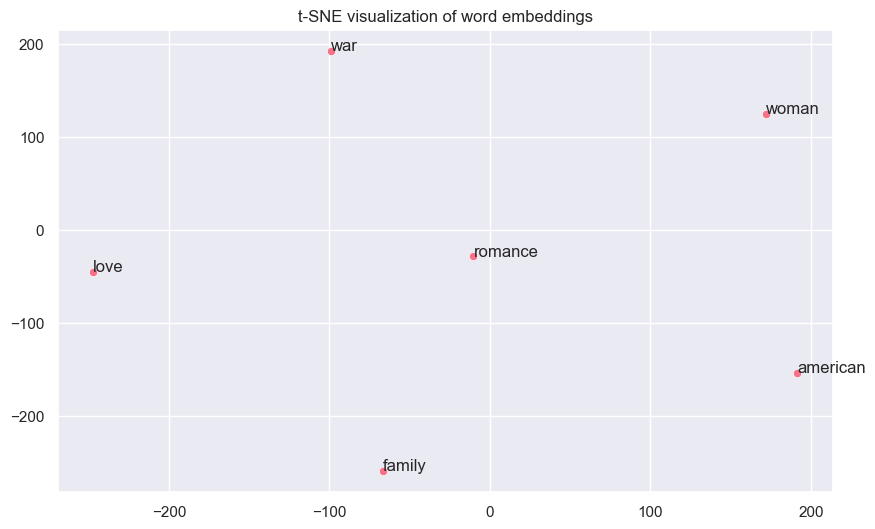

In [ ]:
from sklearn.manifold import TSNE
import numpy as np
def plot_words(model, words):
    # Récupération des vecteurs pour ces mots
    word_vectors = np.array([model.wv[word] for word in words])
    
    # Configuration de t-SNE avec une perplexité adaptée
    # Utilisons une perplexité plus petite, environ 5-10% du nombre de mots
    perplexity = min(len(words)-1, 5)  # S'assure que la perplexité est plus petite que n_samples
    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42)
    reduced = tsne.fit_transform(word_vectors)
    
    # Visualisation
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=reduced[:, 0], y=reduced[:, 1])
    
    # Ajout des annotations (labels)
    for i, word in enumerate(words):
        plt.annotate(word, (reduced[i, 0], reduced[i, 1]))
    
    plt.title('t-SNE visualization of word embeddings')
    plt.show()

# Test avec les mots existants
test_words = ['american', 'love', 'woman', 'family', 'war', 'romance']
existing_words = [word for word in test_words if word in model.wv.key_to_index]
print("Mots présents dans le vocabulaire:", existing_words)

# Utilisation de la fonction plot_words modifiée
plot_words(model, existing_words)

La visualisation t-SNE des embeddings de mots montre la projection en 2D des vecteurs Word2Vec pour des mots clés liés aux films. Cette représentation révèle des relations sémantiques intéressantes :

- Les mots "love" et "romance" sont positionnés relativement proches l'un de l'autre, ce qui reflète leur similarité sémantique dans le contexte des descriptions de films.

- Le mot "war" apparaît isolé en haut du graphique, suggérant un thème distinct dans les synopsis de films.

- Les termes "family" et "woman" sont placés sur des quadrants opposés, indiquant des contextes d'utilisation différents dans notre corpus.

- Le mot "american" se distingue également par sa position, probablement en raison de son utilisation spécifique comme marqueur culturel dans les descriptions.

Cette projection t-SNE permet de visualiser comment notre modèle Word2Vec a capturé les relations sémantiques entre les mots dans l'espace vectoriel. Les distances entre les points reflètent les similarités contextuelles apprises par le modèle à partir des descriptions de films.

In [32]:
# Test d'analogies classiques du type "roi est à reine ce que homme est à femme"
try:
    result = model.wv.most_similar(positive=['woman', 'king'], negative=['man'])
    print("\nTest d'analogie - woman + king - man:")
    for word, score in result[:3]:
        print(f"{word}: {score:.4f}")
except KeyError as e:
    print(f"Certains mots ne sont pas dans le vocabulaire: {e}")


Test d'analogie - woman + king - man:
queen: 0.7616
throne: 0.6688
princess: 0.6617


In [33]:

# Test de similarité entre genres de films
try:
    result = model.wv.most_similar('action')
    print("\nMots les plus similaires à 'action':")
    for word, score in result[:5]:
        print(f"{word}: {score:.4f}")
except KeyError as e:
    print(f"Le mot 'action' n'est pas dans le vocabulaire")


Mots les plus similaires à 'action':
paced: 0.7165
packed: 0.6995
fi: 0.6779
suspense: 0.6743
flick: 0.6597


In [34]:

# Opérations arithmétiques sur les vecteurs
try:
    result = model.wv.most_similar(positive=['hero', 'woman'], negative=['man'])
    print("\nTest d'opération - hero + woman - man:")
    for word, score in result[:3]:
        print(f"{word}: {score:.4f}")
except KeyError as e:
    print(f"Certains mots ne sont pas dans le vocabulaire: {e}")


Test d'opération - hero + woman - man:
heroine: 0.5400
dreamer: 0.5394
rider: 0.5357


In [35]:

# Calcul de similarité cosinus entre deux mots
try:
    similarity = model.wv.similarity('love', 'hate')
    print(f"\nSimilarité cosinus entre 'love' et 'hate': {similarity:.4f}")
except KeyError as e:
    print(f"Certains mots ne sont pas dans le vocabulaire: {e}")



Similarité cosinus entre 'love' et 'hate': 0.4422


In [36]:
# Calcul de similarité cosinus entre deux mots
try:
    similarity = model.wv.similarity('love', 'hate')
    print(f"\nSimilarité cosinus entre 'love' et 'hate': {similarity:.4f}")
except KeyError as e:
    print(f"Certains mots ne sont pas dans le vocabulaire: {e}")


Similarité cosinus entre 'love' et 'hate': 0.4422


In [37]:
# Addition de vecteurs de concepts liés
try:
    result = model.wv.most_similar(positive=['mystery', 'romance'])
    print("\nConcepts proches de mystery + romance:")
    for word, score in result[:5]:
        print(f"{word}: {score:.4f}")
except KeyError as e:
    print(f"Certains mots ne sont pas dans le vocabulaire: {e}")


Concepts proches de mystery + romance:
seduction: 0.7191
misadventure: 0.7157
confusing: 0.7145
morbid: 0.6983
unravels: 0.6976
